In [9]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
import warnings
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

df= pd.read_csv('./dataset/Sonar.csv')
df['Class'].value_counts()

Class
0    111
1     97
Name: count, dtype: int64

In [11]:
np.random.seed(3)
tf.random.set_seed(3)


X = df.iloc[:,:60]
y = df.iloc[:,60]

X_train, X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=42)

model = Sequential()
model.add(Dense(24,input_dim = 60,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(10,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(X_train,y_train,epochs=100,batch_size = 5)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5617 - loss: 0.8536
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5948 - loss: 0.6997
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6355 - loss: 0.6496
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6549 - loss: 0.6113
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6446 - loss: 0.5826
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7361 - loss: 0.5490
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7528 - loss: 0.5272
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7826 - loss: 0.4908
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8141 - loss: 0.4570 
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8328 - loss: 0.4266
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8382 - loss: 0.3904
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [ ]:
hidden_units = [2,3,6,12,24]

np.random.seed(3)
tf.random.set_seed(3)

validation_list =[]
for i , units in enumerate(hidden_units):
    model = Sequential()
    model.add(Dense(units,input_dim = 60,activation = 'relu'))
    # model.add(BatchNormalization())
    model.add(Dense(10,activation = 'relu'))
    model.add(Dense(1,activation = 'sigmoid'))
    
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    model.fit(X,y,epochs=100,batch_size = 5)
    result = model.evaluate(X_test, y_test)
    val_dict = dict()
    val_dict[f'accuracy_{units}'] = result[1]
    val_dict[f'loss_{units}'] = result[0]

    validation_list.append(val_dict)
    # print(f'검증셋의 accuracy :  {result[1]} , loss : {result[0]}')
print(validation_list)

Epoch 1/100


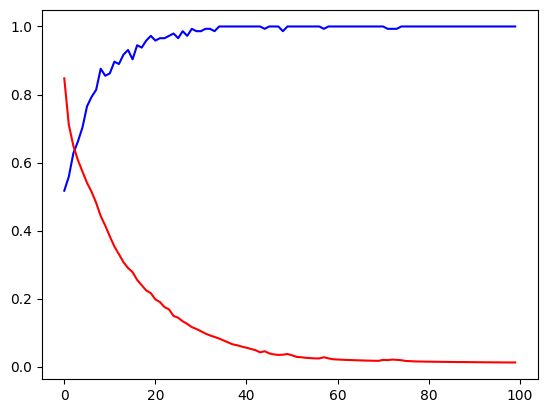

In [12]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
loss = history.history['loss']

plt.plot(accuracy, color = 'blue')
plt.plot(loss, color = 'red')

plt.show()

In [13]:
model.save('./model/my_model.h5')